<a href="https://colab.research.google.com/github/hermanodfc/BSI-UFRPE/blob/master/HERMANO_DIOGENES_FERREIRA_COSTA_exercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Universidade Federal Rural de Pernambuco - UFRPE
##Aluno: Hermano Diogenes Ferreira Costa
##Disciplina: Estatística Aplicada à Análise de Dados

HERMANO DIOGENES FERREIRA COSTA_exercicio_4

# Configurando o ambiente

In [ ]:
!apt install -y graphviz
!pip install graphviz
import pandas as pd
from IPython.display import Markdown
from graphviz import Digraph
from matplotlib_venn import venn3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# Questão 1
A tabela abaixo mostra o numero dos filmes alugados numa locadora:


  <!-- --> | Comédia | Romance | Policial
  -|-|-|-
  Homens | 143 | 96 | 255
  Mulheres | 104 | 183 | 73

Calcular a probabilidade de:

##### a) Um filme ser alugado pela mulher


In [ ]:
dados = {"Comédia": [143, 104], "Romance": [96, 183], "Policial": [255, 73]}
questao1_df_abs = pd.DataFrame(data=dados, index=["Homens", "Mulheres"])

questao1_df_abs["Total"] = questao1_df_abs.sum(axis=1)
totais = questao1_df_abs.sum()
totais.name = "Total"
questao1_df_abs = questao1_df_abs.append(totais.to_frame().transpose())

lin, col = questao1_df_abs.shape
lin -= 1
col -= 1
soma_total = questao1_df_abs.iloc[lin, col]

questao1_df_rel = questao1_df_abs / soma_total

p_M = questao1_df_rel.loc['Mulheres', 'Total']


display(Markdown("**Valores absolutos**"), questao1_df_abs)
print()
display(Markdown("**Valores relativos**"), questao1_df_rel)
print()
display(Markdown(f'**Probabilidade de um filme ser alugado por uma mulher [P(M)]:** {p_M:.6f}'))

**Valores absolutos**

,Comédia,Romance,Policial,Total
Homens,143,96,255,494
Mulheres,104,183,73,360
Total,247,279,328,854


**Valores relativos**

,Comédia,Romance,Policial,Total
Homens,0.167447,0.112412,0.298595,0.578454
Mulheres,0.121780,0.214286,0.085480,0.421546
Total,0.289227,0.326698,0.384075,1.000000


**Probabilidade de um filme ser alugado por uma mulher [P(M)]:** 0.421546

##### b) Um filme ser o filme romance


In [ ]:
p_R = questao1_df_rel.loc['Total', 'Romance']
display(Markdown(f'**Probabilidade de um filme ser romance [P(R)]:** {p_R:.6f}'))

**Probabilidade de um filme ser romance [P(R)]:** 0.326698

##### c) Um filme ser alugado pelo homem dado que o filme é comedia


In [ ]:
display(Markdown(r"$P(H|C)= \dfrac{P(H \cap C)}{P(C)}$"))
print()

p_HC = questao1_df_rel.loc['Homens', 'Comédia']
p_C = questao1_df_rel.loc['Total', 'Comédia']
p_H_dado_C = p_HC / p_C

display(Markdown(f"$P(H \\cap C)={p_HC:.6f}$"))
print()
display(Markdown(f"$P(C)={p_C:.6f}$"))
print()
display(Markdown(f"$P(H|C)= {p_H_dado_C:.6f}$"))
print()
display(Markdown(f'**Probabilidade de um filme ser alugado pelo homem dado que o filme é comedia [P(H|C)]:** {p_H_dado_C:.6f}'))

$P(H|C)= \dfrac{P(H \cap C)}{P(C)}$

$P(H \cap C)=0.167447$

$P(C)=0.289227$

$P(H|C)= 0.578947$

**Probabilidade de um filme ser alugado pelo homem dado que o filme é comedia [P(H|C)]:** 0.578947

# Questão 2

Numa certa cidade, a probabilidade de chuva em um dia qualquer de primavera é de 15%. Um meteorologista acerta suas previsões em 80% dos dias em que chove e em 85% dos dias em que não chove.


##### a) Qual é a probabilidade de o meteorologista acertar sua previsão?


In [ ]:
display(Markdown(r"$P(A)= P(A \cap C) + P(A \cap C^c)$"))
print()
display(Markdown(r"$P(A)= P(C)P(A|C) + P(C^c)P(A|C^c)$"))
print()
p_C = 0.15
p_Ccomp = 1 - p_C
p_A_dado_C = 0.80
p_A_dado_Ccomp = 0.85
p_A = p_C * p_A_dado_C + p_Ccomp * p_A_dado_Ccomp
display(Markdown(f"$P(A)= {p_C}*{p_A_dado_C} + {p_Ccomp}*{p_A_dado_Ccomp}$"))
print()
display(Markdown(f"$P(A)= {p_A:.4f}$"))
print()
display(Markdown(f'**Probabilidade de o meteorologista acertar sua previsão:** {p_A:.4f}'))

$P(A)= P(A \cap C) + P(A \cap C^c)$

$P(A)= P(C)P(A|C) + P(C^c)P(A|C^c)$

$P(A)= 0.15*0.8 + 0.85*0.85$

$P(A)= 0.8425$

**Probabilidade de o meteorologista acertar sua previsão:** 0.8425

##### b)  Se não houve acerto na previsão feita, qual é a probabilidade de ter sido um dia da chuva?


$P(C|A^c) = \dfrac{P(A^c \cap C)}{P(A^c)}= \dfrac{P(C)P(A^c|C)}{P(A^c)}$

$P(C|A^c) = \dfrac{0.15*0.2000}{0.1575} \approx 0.1905$

**Caso não haja acerto na previsão feita, a probabilidade de ter sido um dia da chuva é:** 0.1905

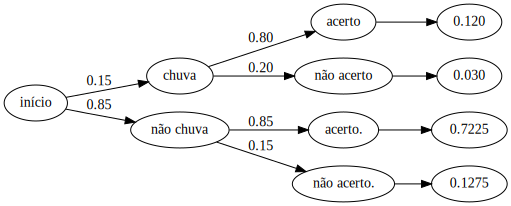

In [ ]:
display(Markdown(r"$P(C|A^c) = \dfrac{P(A^c \cap C)}{P(A^c)}= \dfrac{P(C)P(A^c|C)}{P(A^c)}$"))
print()
p_C_dado_Acomp = p_C*(1 - p_A_dado_C)/(1 - p_A)
display(Markdown(f"$P(C|A^c) = \\dfrac{{{p_C}*{1 - p_A_dado_C:.4f}}}{{{1 - p_A:.4f}}} \\approx {p_C_dado_Acomp:.4f}$"))
print()
display(Markdown(f'**Caso não haja acerto na previsão feita, a probabilidade de ter sido um dia da chuva é:** {p_C_dado_Acomp:.4f}'))
print()
g = Digraph()
g.attr(rankdir='LR')
g.edge('início', 'chuva', label="0.15")
g.edge('início', 'não chuva', label="0.85")
g.edge('chuva', 'acerto', label="0.80")
g.edge('chuva', 'não acerto', label="0.20")
g.edge('não chuva', 'acerto.', label="0.85")
g.edge('não chuva', 'não acerto.', label="0.15")
g.edge('acerto', '0.120')
g.edge('não acerto', '0.030' )
g.edge('acerto.', '0.7225')
g.edge('não acerto.', '0.1275')
g

# Questão 3

Em uma escola, 60% de estudantes não usam anel nem colar, 20% usam anel e 30% colar. Se um aluno é escolhido aletoriamente, qual a probabilidade de que estaja usando...


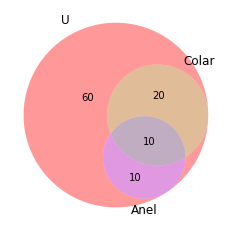

In [ ]:
v = venn3(subsets=(60,0,20,0,10,0,10), set_labels = ('U', 'Colar', 'Anel'))


##### a)  Pelo menos uma das joias?

In [ ]:
display(Markdown(r"$P(Colar \cup Anel) = P(Colar) + P(Anel) - P(Colar \cap Anel)= 20 + 30 - 10 = 40\%$"))

$P(Colar \cup Anel) = P(Colar) + P(Anel) - P(Colar \cap Anel)= 20 + 30 - 10 = 40\%$

##### b) Ambas as joias

In [ ]:
display(Markdown(r"$P(Colar \cap Anel) = 10\%$"))

$P(Colar \cap Anel) = 10\%$

##### c) Um anel mas não um colar?


In [ ]:
display(Markdown(r"$P(Anel - Colar) = P(Anel) - P(Colar \cap Anel)= 20 - 10 = 10\%$"))

$P(Anel - Colar) = P(Anel) - P(Colar \cap Anel)= 20 - 10 = 10\%$